### **CC57 - MACHINE LEARNING - PREPROCESAMIENTO DE DATOS**

**Nombres / Apellidos:**

Nikole Scarlet Garcia Chavez

**Código:**
u20181b618
---

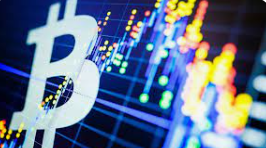

El dataset global de criptomonedas es un conjunto de datos completo  que ofrece una gran cantidad de información sobre más de 7500 criptomonedas, cada una de ellas combinada con el dólar estadounidense (USD). Este conjunto de datos es un recurso invaluable para cualquier persona interesada en explorar el mundo de las monedas digitales y analizar su comportamiento en el mercado. Estos no solo incluyen monedas populares como BTC, ETH y SOL, sino que también capturan monedas recién lanzadas.

**Estructura del Dataset**

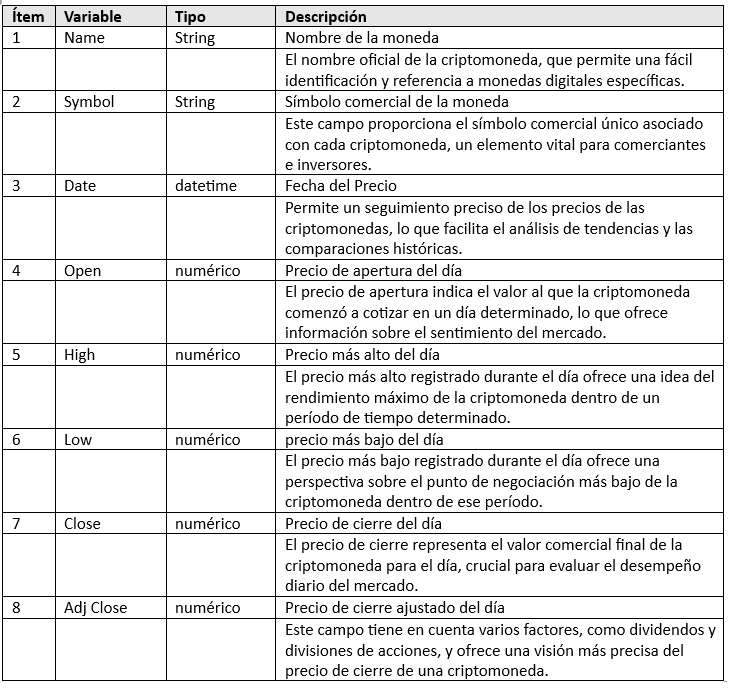 


**SE SOLICITA:**

**a)**Cargar los datos

**b)** Realizar tareas de preprocesamiento sobre los datos

**c)**Crear un dataset limpio

**d)** Realizar un analisis EDA (considere las visualizaciones que crea necesarias).

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir la ruta de la carpeta donde están los archivos CSV
data_path = "data/"

# Obtener la lista de archivos CSV en la carpeta
csv_files = [f for f in os.listdir(data_path) if f.endswith(".csv")]

# Lista para almacenar los DataFrames
dataframes = []

# Cargar y combinar los datos
total_rows = 0
for file in csv_files:
    file_path = os.path.join(data_path, file)
    df = pd.read_csv(file_path)
    total_rows += len(df)
    dataframes.append(df)


# Concatenar todos los DataFrames en uno solo
data = pd.concat(dataframes, ignore_index=True)

C:\Users\Proyectos\AppData\Local\Temp\ipykernel_23532\1405430242.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat(dataframes, ignore_index=True)


In [24]:
# Ver las primeras filas del dataset
print("Dataset combinado:")
print(data.head())

Dataset combinado:
           Name  Symbol        Date      Open      High       Low     Close  \
0  00 Token USD  00-USD  2022-10-11  1.190144  1.660042  0.919855  1.489128   
1  00 Token USD  00-USD  2022-10-12  1.488328  1.501354  0.901557  0.950235   
2  00 Token USD  00-USD  2022-10-13  0.957844  1.028362  0.623459  0.715175   
3  00 Token USD  00-USD  2022-10-14  0.712093  0.774920  0.587321  0.613726   
4  00 Token USD  00-USD  2022-10-15  0.613757  0.628270  0.514643  0.520398   

   Adj Close    Volume  
0   1.489128   8680395  
1   0.950235  10585178  
2   0.715175   5019056  
3   0.613726   2636988  
4   0.520398   2317462  


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351194 entries, 0 to 5351193
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Name       object 
 1   Symbol     object 
 2   Date       object 
 3   Open       float64
 4   High       float64
 5   Low        float64
 6   Close      float64
 7   Adj Close  float64
 8   Volume     object 
dtypes: float64(5), object(4)
memory usage: 367.4+ MB


In [26]:
# PREPROCESAMIENTO
# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Eliminar valores nulos
data = data.dropna()

# Verificar y eliminar duplicados
data = data.drop_duplicates()

# Crear un dataset limpio 
data.to_csv("cleaned_crypto_data.csv", index=False)

In [28]:
# ANÁLISIS EXPLORATORIO DE DATOS (EDA)
print("\nInformación del dataset limpio:")
print(data.info())


Información del dataset limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351194 entries, 0 to 5351193
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Name       object        
 1   Symbol     object        
 2   Date       datetime64[ns]
 3   Open       float64       
 4   High       float64       
 5   Low        float64       
 6   Close      float64       
 7   Adj Close  float64       
 8   Volume     object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 367.4+ MB
None


In [30]:
import numpy as np

# Seleccionar solo las columnas numéricas
numeric_cols = data.select_dtypes(include=[np.number])

# Calcular IQR solo para columnas numéricas
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos
outliers = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))

# Contar valores atípicos en cada columna
print(outliers.sum())

# Eliminar filas con valores atípicos
data = data[~outliers.any(axis=1)]


Open         973657
High         973146
Low          974361
Close        973757
Adj Close    973757
dtype: int64


In [31]:
outliers = (numeric_cols < (Q1 - 3 * IQR)) | (numeric_cols > (Q3 + 3 * IQR))
print(outliers.sum())  # Revisar cuántos valores atípicos quedan

Open         751750
High         745319
Low          796228
Close        752398
Adj Close    752398
dtype: int64


In [32]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(numeric_cols))
outliers = (z_scores > 3)  # Considerando valores fuera de 3 desviaciones estándar
print(outliers.sum())  # Cuántos valores atípicos hay


6196


In [38]:
import pandas as pd

# Convertir outliers a un DataFrame de Pandas con el mismo índice que data
outliers_df = pd.DataFrame(outliers, index=numeric_cols.index, columns=numeric_cols.columns)

# Crear una máscara asegurando que coincida con data
mask = outliers_df.any(axis=1)

# Aplicar la máscara para eliminar los valores atípicos
data = data.loc[~mask]

# Verificar la nueva cantidad de datos
print(f"Cantidad de datos después de eliminar outliers: {len(data)}")


Cantidad de datos después de eliminar outliers: 4355300


In [39]:
print("\nInformación del dataset limpio:")
print(data.info())


Información del dataset limpio:
<class 'pandas.core.frame.DataFrame'>
Index: 4355300 entries, 4 to 5351193
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Name       object        
 1   Symbol     object        
 2   Date       datetime64[ns]
 3   Open       float64       
 4   High       float64       
 5   Low        float64       
 6   Close      float64       
 7   Adj Close  float64       
 8   Volume     object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 332.3+ MB
None


In [40]:
# Resumen estadístico
describe = data.describe()
print("\nResumen estadístico:")
print(describe)



Resumen estadístico:
                                Date          Open          High  \
count                        4355300  4.355300e+06  4.355300e+06   
mean   2022-03-02 15:06:58.252337408  6.212740e-02  6.601120e-02   
min              2014-09-17 00:00:00  0.000000e+00  0.000000e+00   
25%              2021-06-29 00:00:00  6.840000e-04  7.440000e-04   
50%              2022-07-31 00:00:00  7.743000e-03  8.283000e-03   
75%              2023-04-01 00:00:00  5.619625e-02  6.005100e-02   
max              2023-10-25 00:00:00  6.593470e-01  7.037340e-01   
std                              NaN  1.199335e-01  1.268201e-01   

                Low         Close     Adj Close  
count  4.355300e+06  4.355300e+06  4.355300e+06  
mean   5.837820e-02  6.186582e-02  6.186582e-02  
min   -1.040200e-01  0.000000e+00  0.000000e+00  
25%    6.261193e-04  6.810000e-04  6.810000e-04  
50%    7.193480e-03  7.715000e-03  7.715000e-03  
75%    5.250725e-02  5.597100e-02  5.597100e-02  
max    6.170770

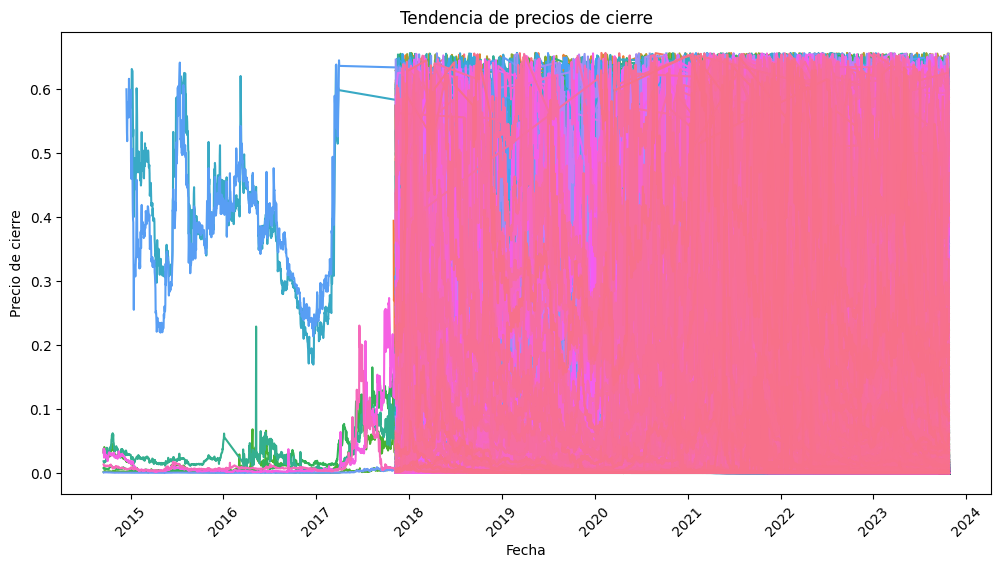

In [41]:

# Visualización de tendencias de precios
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Close', hue='Symbol', legend=False)
plt.title("Tendencia de precios de cierre")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.xticks(rotation=45)
plt.show()

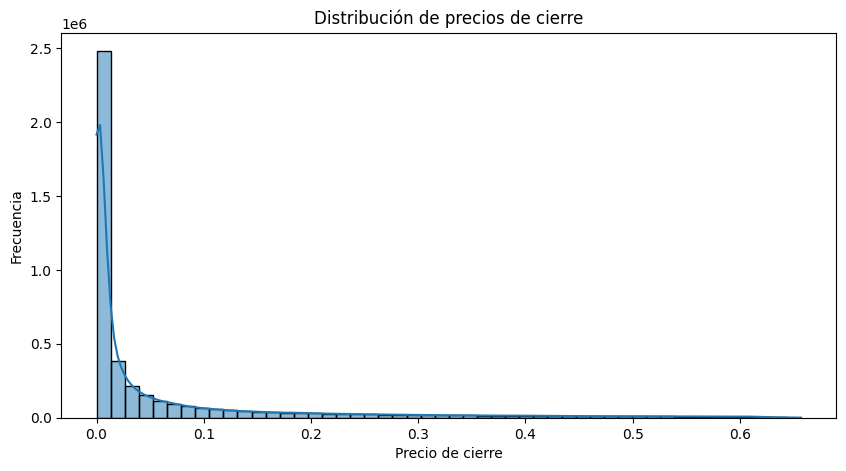

In [42]:
# Histograma de precios de cierre
plt.figure(figsize=(10, 5))
sns.histplot(data['Close'], bins=50, kde=True)
plt.title("Distribución de precios de cierre")
plt.xlabel("Precio de cierre")
plt.ylabel("Frecuencia")
plt.show()

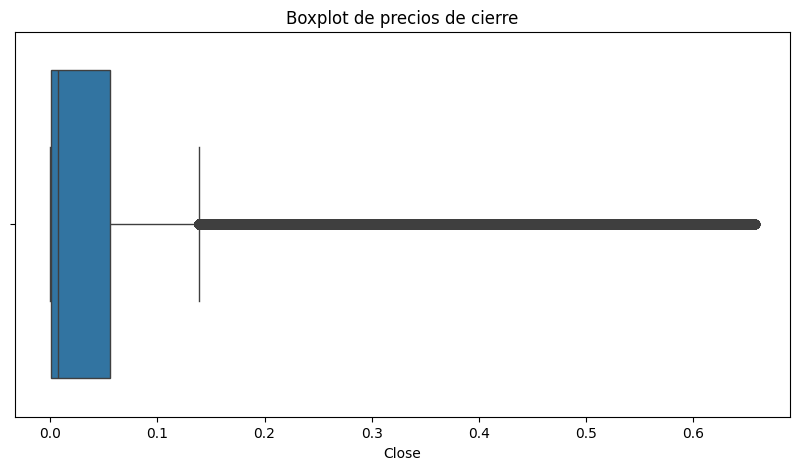

In [43]:
# Boxplot para detectar outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Close'])
plt.title("Boxplot de precios de cierre")
plt.show()

In [9]:
print(data[['Close']].describe())

              Close
count  5.351194e+06
mean   2.556928e+02
std    5.419293e+04
min    0.000000e+00
25%    1.363000e-03
50%    1.859200e-02
75%    2.636520e-01
max    9.403425e+07


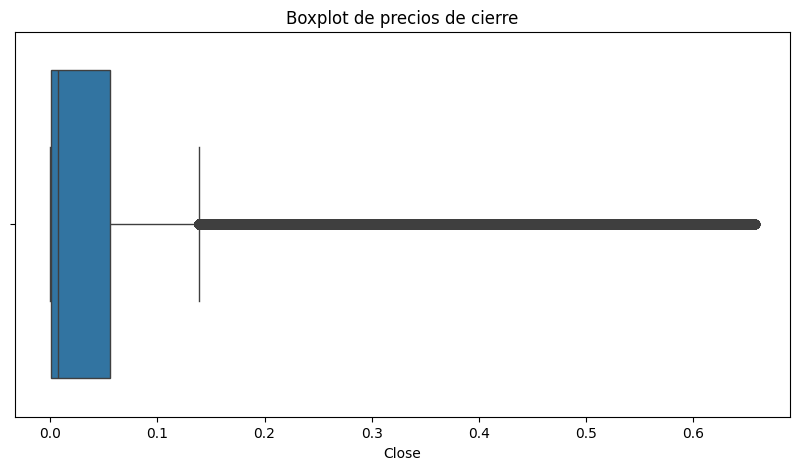

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Close'])
plt.title("Boxplot de precios de cierre")
plt.show()


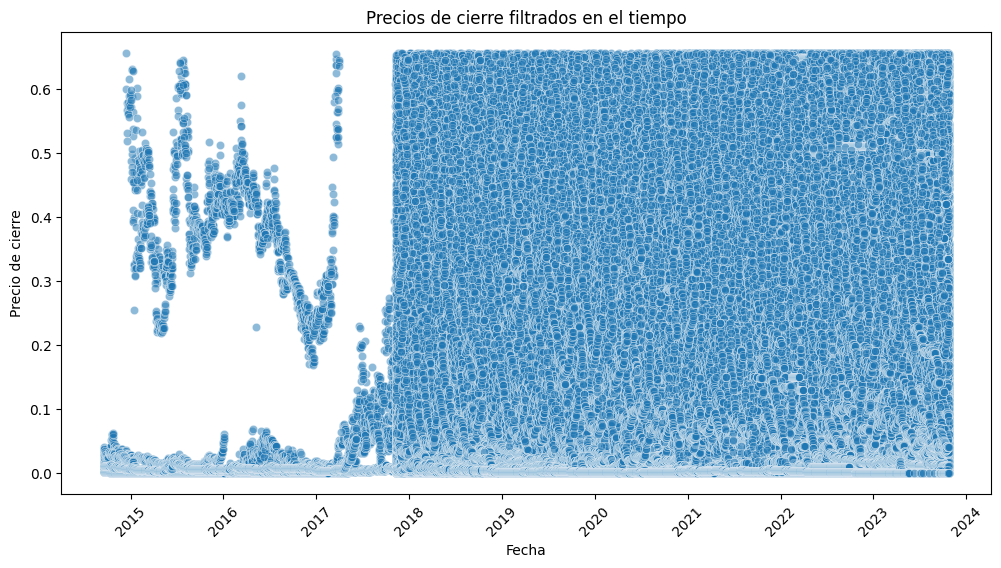

In [15]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_filtrada, x='Date', y='Close', alpha=0.5)
plt.title("Precios de cierre filtrados en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.xticks(rotation=45)
plt.show()


In [14]:
q1 = data['Close'].quantile(0.25)
q3 = data['Close'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

data_filtrada = data[(data['Close'] >= limite_inferior) & (data['Close'] <= limite_superior)]


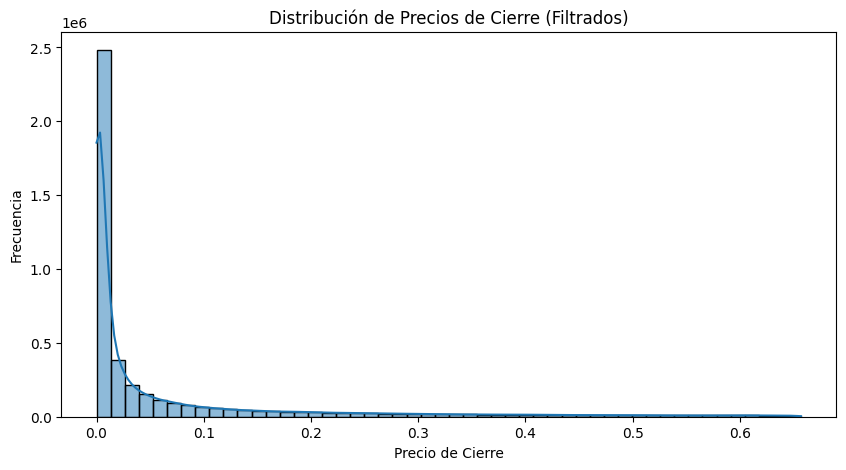

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(data_filtrada['Close'], bins=50, kde=True)  # kde=True para la curva de densidad
plt.title("Distribución de Precios de Cierre (Filtrados)")
plt.xlabel("Precio de Cierre")
plt.ylabel("Frecuencia")
plt.show()


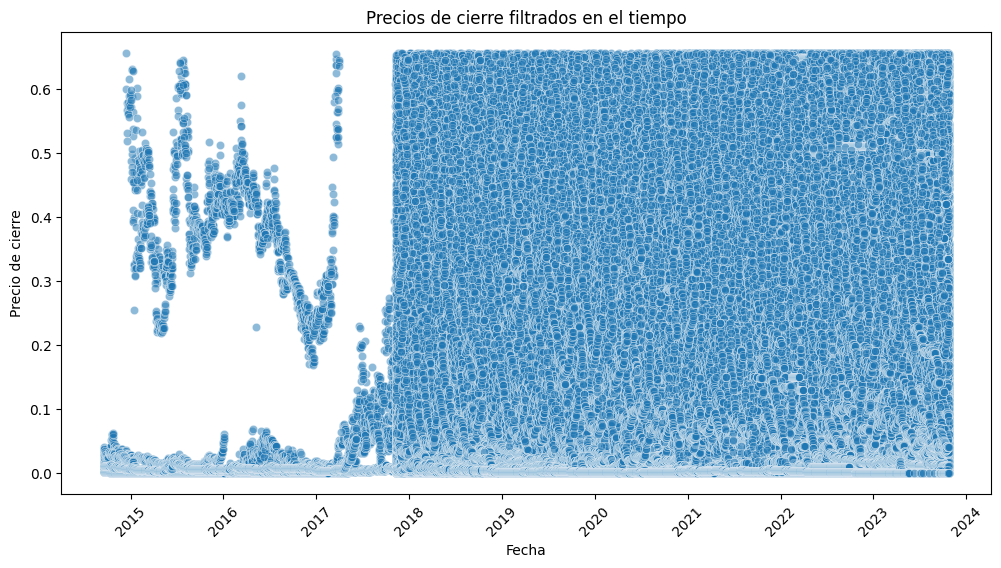

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_filtrada, x='Date', y='Close', alpha=0.5)
plt.title("Precios de cierre filtrados en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.xticks(rotation=45)
plt.show()


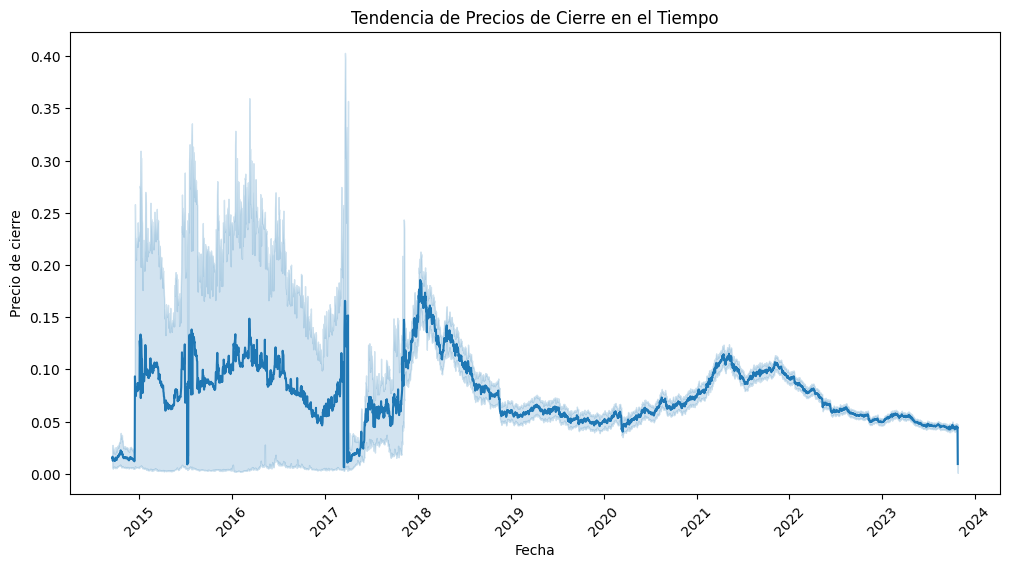

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_filtrada, x='Date', y='Close')
plt.title("Tendencia de Precios de Cierre en el Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.xticks(rotation=45)
plt.show()


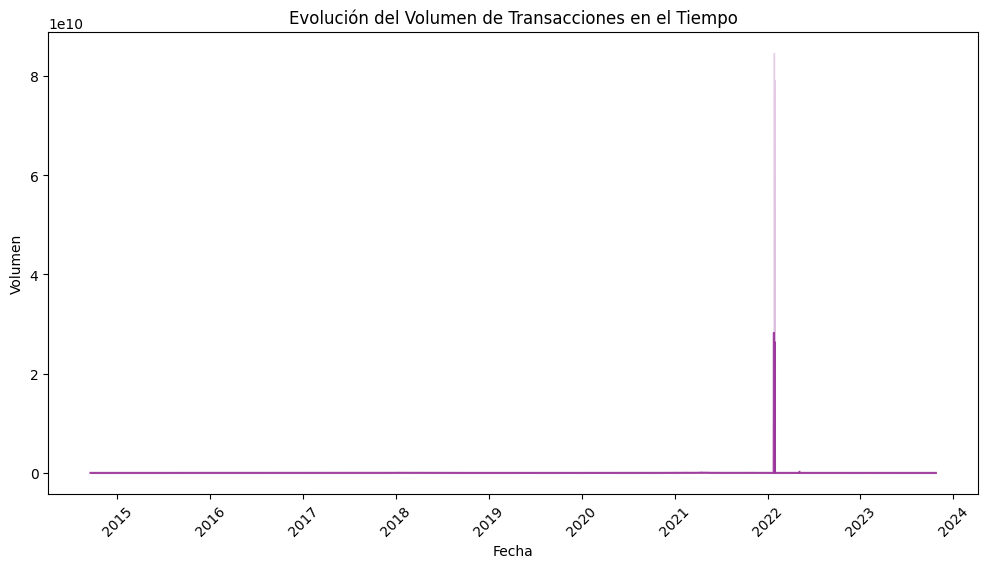

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_filtrada, x='Date', y='Volume', color='purple', alpha=0.7)
plt.title("Evolución del Volumen de Transacciones en el Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.xticks(rotation=45)
plt.show()


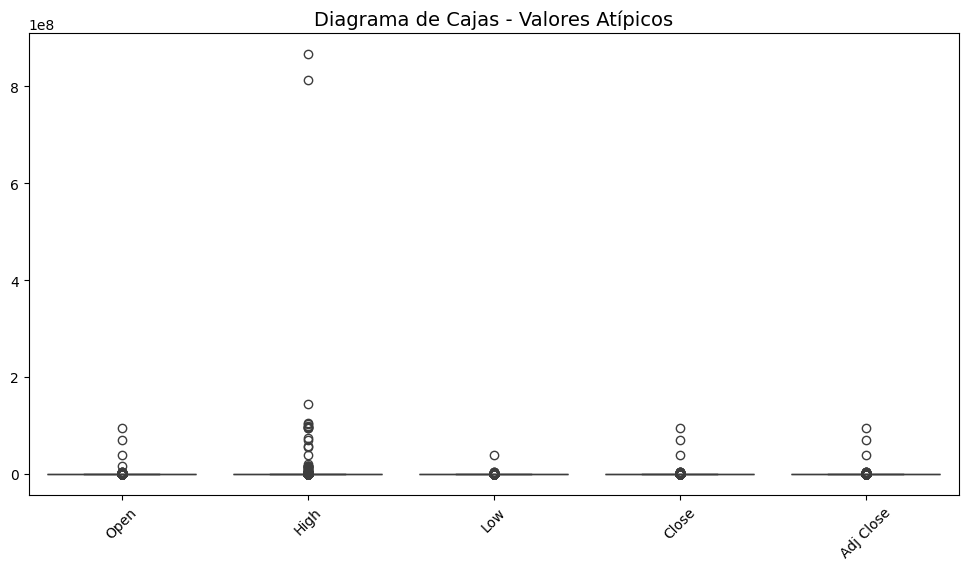

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Graficar boxplot de todas las columnas numéricas
sns.boxplot(data=numeric_cols)

# Agregar título
plt.title("Diagrama de Cajas - Valores Atípicos", fontsize=14)

# Rotar las etiquetas del eje X si hay muchas columnas
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


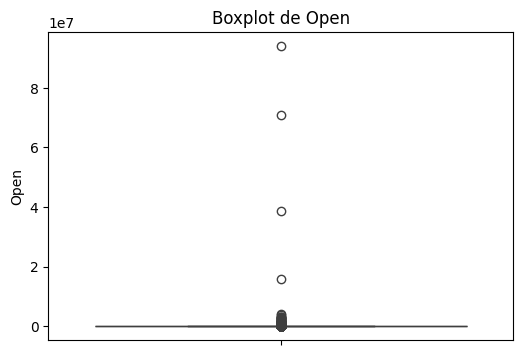

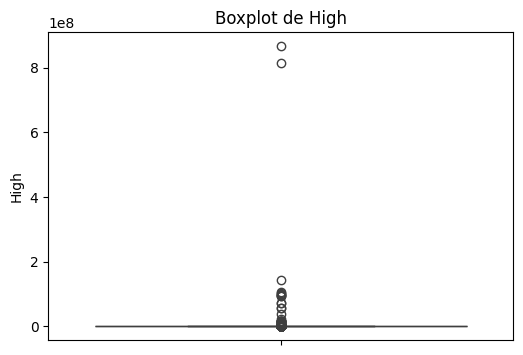

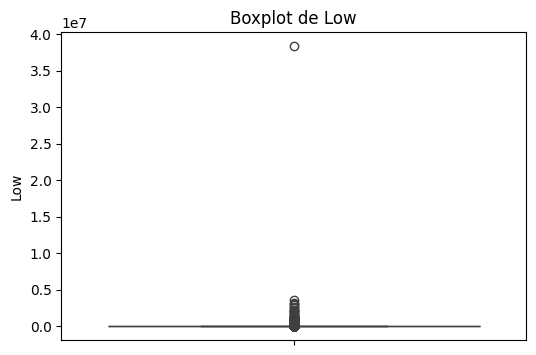

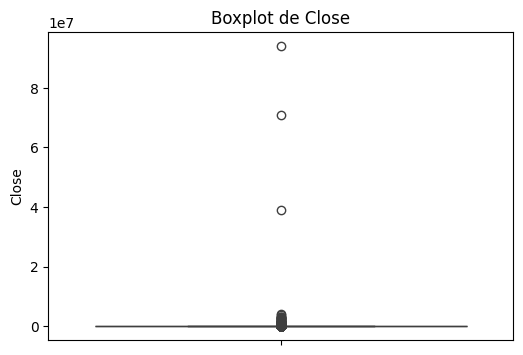

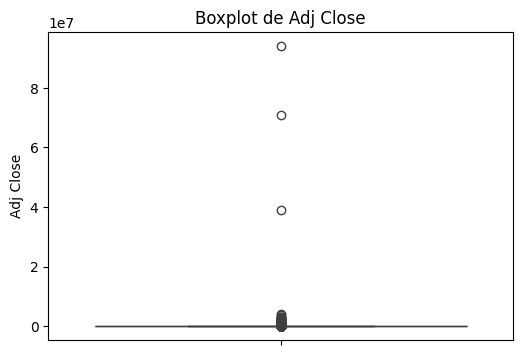

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear boxplots para cada columna numérica
for col in numeric_cols.columns:
    plt.figure(figsize=(6, 4))  # Tamaño del gráfico
    sns.boxplot(y=numeric_cols[col])  # Gráfico de caja para cada columna
    plt.title(f"Boxplot de {col}")  # Título del gráfico
    plt.show()  # Mostrar gráfico
